## IMPORTAMOS LIBRERIAS Y ACCEDEMOS A LAS TABLAS

In [59]:
%pip install xlwt

     ------------------------------------ 100.0/100.0 kB 717.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from datetime import datetime
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
import numeritos as nitos
from sklearn.feature_extraction.text import CountVectorizer
import openpyxl
import nltk
nltk.download('stopwords')

pygame 2.1.2 (SDL 2.0.18, Python 3.10.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Javier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
stopwords.words('spanish')[:5]

['de', 'la', 'que', 'el', 'en']

In [3]:
connection = sqlite3.connect("Twitter_bridge.db")
crsr = connection.cursor()

In [4]:
# Con esta función leemos los datos y lo pasamos a un DataFrame de Pandas
def sql_query(query):

    # Ejecuta la query
    crsr.execute(query)

    # Almacena los datos de la query 
    ans = crsr.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in crsr.description]

    return pd.DataFrame(ans,columns=names)

In [ ]:
# ATENCIÓN! Al terminar hay que cerrar la conexión a la DB para que se guarden los cambios!!!!!!
#connection.commit()
#connection.close()

In [5]:
query = '''
SELECT * FROM TWEETS
;
'''
df_tweets = sql_query(query)
df_tweets.head()

,index,identity,text,created,user_id,quote,reply,retweet,favorite
0,2,1577720804619571201,RT @TheBridge_Tech: Ya están aquí nuestros pri...,2022-10-05 18:02:07+00:00,1099588676181471233,0,0,0,0
1,3,1577648996927012866,RT @TheBridge_Tech: ¡Feliz Día a nuestros Lead...,2022-10-05 13:16:46+00:00,763045308095950848,0,0,0,0
2,4,1577646040269864960,RT @TheBridge_Tech: ¡Feliz Día a nuestros Lead...,2022-10-05 13:05:01+00:00,1099588676181471233,0,0,0,0
3,5,1577335173523308544,RT @PauMugarra: Recordaros que la semana que v...,2022-10-04 16:29:45+00:00,7154412,0,0,0,0
4,6,1577334577701453827,Recordaros que la semana que viene tenemos la ...,2022-10-04 16:27:23+00:00,1003872445,0,0,2,12


In [6]:
query = '''
SELECT * FROM USERS
;
'''
df_user = sql_query(query)
df_user.head()

,index,user_id,user_name,user_screen_name
0,3,763045308095950848,763045308095950848,Carlosevi94
1,5,7154412,7154412,Recuenco
2,9,1392422091434168323,1392422091434168323,IDBootcamps
3,11,1157259865389244417,1157259865389244417,burbujadev
4,12,2529499620,2529499620,formacion_fuc3


#### 1.- TWEET MÁS RELEVANTE

In [7]:
df_tweets.head()

,index,identity,text,created,user_id,quote,reply,retweet,favorite
0,2,1577720804619571201,RT @TheBridge_Tech: Ya están aquí nuestros pri...,2022-10-05 18:02:07+00:00,1099588676181471233,0,0,0,0
1,3,1577648996927012866,RT @TheBridge_Tech: ¡Feliz Día a nuestros Lead...,2022-10-05 13:16:46+00:00,763045308095950848,0,0,0,0
2,4,1577646040269864960,RT @TheBridge_Tech: ¡Feliz Día a nuestros Lead...,2022-10-05 13:05:01+00:00,1099588676181471233,0,0,0,0
3,5,1577335173523308544,RT @PauMugarra: Recordaros que la semana que v...,2022-10-04 16:29:45+00:00,7154412,0,0,0,0
4,6,1577334577701453827,Recordaros que la semana que viene tenemos la ...,2022-10-04 16:27:23+00:00,1003872445,0,0,2,12


In [8]:
df_tweets['populous']=df_tweets['quote']+df_tweets['reply']+df_tweets['retweet']+df_tweets['favorite']
df_1=pd.DataFrame()
df_1['identity']=df_tweets['identity']
df_1['text']=df_tweets['text']
df_1['populous']=df_tweets['populous']

df_1.sort_values('populous',ascending=False).head(1)

,identity,text,populous
27,1573246948693651456,Y seguimos con lo prometido:\n\nPrimera quedad...,31


#### Mostramos en gráfica

In [9]:
df_grafica_1= df_1.sort_values('populous',ascending=False)
df_grafica_1.head(10)

,identity,text,populous
27,1573246948693651456,Y seguimos con lo prometido:\n\nPrimera quedad...,31
65,1567815140455710721,Ya está abierto el registro para nuestra reuni...,16
4,1577334577701453827,Recordaros que la semana que viene tenemos la ...,14
53,1570049430807785472,Hoy he hecho el primer mind map de mi vida ent...,8
15,1575217357105946624,Hoy por fin ve la luz mi primer Case Study púb...,7


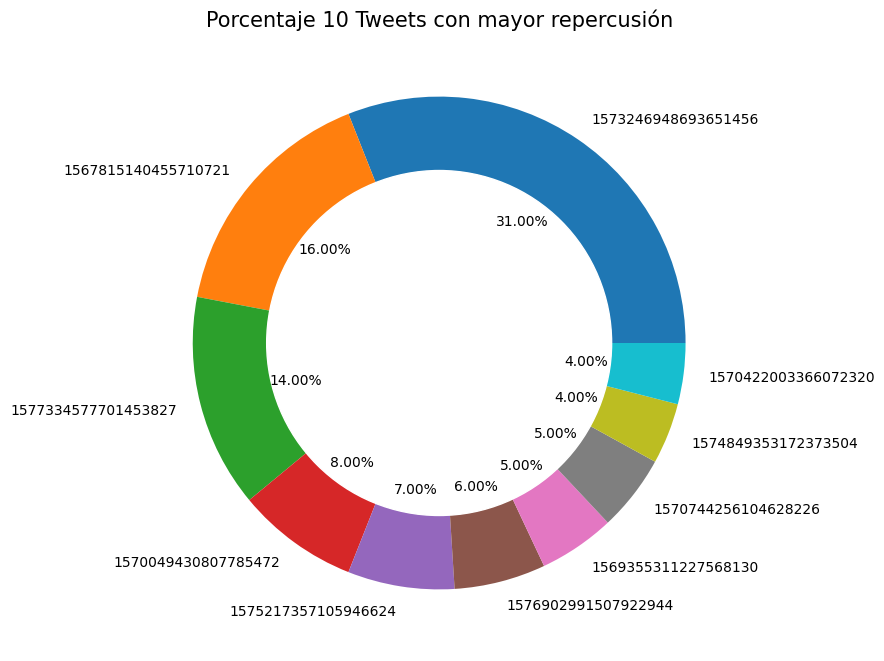

In [28]:
#data = df_grafica_1["populous"].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0),
                     0.7, # Grosor del donut
                     color='white')

plt.figure(figsize=(8,8))

plt.pie(df_grafica_1["populous"].head(10),
        labels=df_grafica_1["identity"].head(10),
        autopct='%1.2f%%');

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Porcentaje 10 Tweets con mayor repercusión',fontsize=15);

#### 2.- USER MÁS INFLUYENTE

In [31]:
query1 = '''
CREATE VIEW influent as
SELECT USERS.user_name,USERS.user_screen_name, TWEETS.text FROM USERS INNER JOIN TWEETS on USERS.user_id=TWEETS.user_id
;
'''
crsr.execute(query1)
res = crsr.execute("SELECT name FROM sqlite_master WHERE type='view';")
for name in res:
    print(name[0])

OperationalError: table influent already exists

In [32]:
query = '''
SELECT user_name,user_screen_name,COUNT(text) FROM influent GROUP BY user_name  ORDER BY 3 DESC
;
'''
df_influencer = sql_query(query)
df_influencer.head()

,user_name,user_screen_name,COUNT(text)
0,1099588676181471233,turoninos,15
1,1494355208473874438,PyDataMadrid,6
2,1162694149956603904,TheBridge_Tech,4
3,1533105519447404544,PythonBot_By_PM,2
4,1073622740,COITCV,2


#### Mostramos en gráfica

In [33]:
df_grafica_2= df_influencer
df_grafica_2.head()

,user_name,user_screen_name,COUNT(text)
0,1099588676181471233,turoninos,15
1,1494355208473874438,PyDataMadrid,6
2,1162694149956603904,TheBridge_Tech,4
3,1533105519447404544,PythonBot_By_PM,2
4,1073622740,COITCV,2


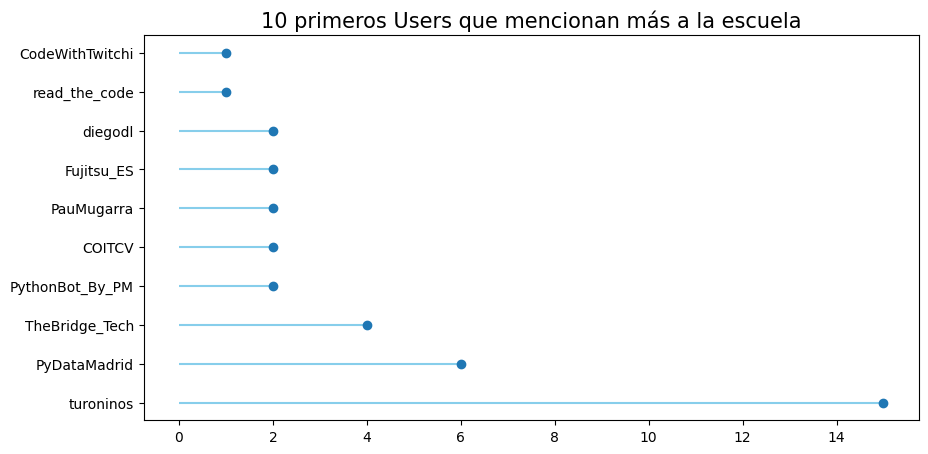

In [42]:
plt.figure(figsize=(10,5))
plt.hlines(y=df_grafica_2['user_screen_name'].head(10),
           xmin=0,
           xmax=df_grafica_2['COUNT(text)'].head(10),
           color='skyblue')
plt.plot(df_grafica_2['COUNT(text)'].head(10), df_grafica_2['user_screen_name'].head(10), "o")
plt.title('10 primeros Users que mencionan más a la escuela',fontsize=15);

#### 3.- MES MÁS ACTIVO

In [7]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     68 non-null     int64 
 1   identity  68 non-null     int64 
 2   text      68 non-null     object
 3   created   68 non-null     object
 4   user_id   68 non-null     int64 
 5   quote     68 non-null     int64 
 6   reply     68 non-null     int64 
 7   retweet   68 non-null     int64 
 8   favorite  68 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 4.9+ KB


In [8]:
df_tweets['month'] = pd.to_datetime(df_tweets['created']).dt.month
df_tweets.head()

,index,identity,text,created,user_id,quote,reply,retweet,favorite,month
0,2,1577720804619571201,RT @TheBridge_Tech: Ya están aquí nuestros pri...,2022-10-05 18:02:07+00:00,1099588676181471233,0,0,0,0,10
1,3,1577648996927012866,RT @TheBridge_Tech: ¡Feliz Día a nuestros Lead...,2022-10-05 13:16:46+00:00,763045308095950848,0,0,0,0,10
2,4,1577646040269864960,RT @TheBridge_Tech: ¡Feliz Día a nuestros Lead...,2022-10-05 13:05:01+00:00,1099588676181471233,0,0,0,0,10
3,5,1577335173523308544,RT @PauMugarra: Recordaros que la semana que v...,2022-10-04 16:29:45+00:00,7154412,0,0,0,0,10
4,6,1577334577701453827,Recordaros que la semana que viene tenemos la ...,2022-10-04 16:27:23+00:00,1003872445,0,0,2,12,10


In [9]:
df_3=df_tweets.groupby('month')['text'].count().sort_values(ascending=False)
df_3.head()

month
9     56
10    12
Name: text, dtype: int64

#### Mostramos en gráfica

In [10]:
df_grafica_3=df_3
df_grafica_3

month
9     56
10    12
Name: text, dtype: int64

In [12]:
df_grafica_3.to_excel(r'D:\Bootcamp_22/proyecto_twitter/images/df_tweets_mes.xls',sheet_name='tweets_mes',index=True,header=True)

C:\Users\Javier\AppData\Local\Temp\ipykernel_5460\1584816601.py:1: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.



#### 4.- PALABRAS MÁS FRECUENTES

In [13]:
df_tweets.head()

,index,identity,text,created,user_id,quote,reply,retweet,favorite,month
0,2,1577720804619571201,RT @TheBridge_Tech: Ya están aquí nuestros pri...,2022-10-05 18:02:07+00:00,1099588676181471233,0,0,0,0,10
1,3,1577648996927012866,RT @TheBridge_Tech: ¡Feliz Día a nuestros Lead...,2022-10-05 13:16:46+00:00,763045308095950848,0,0,0,0,10
2,4,1577646040269864960,RT @TheBridge_Tech: ¡Feliz Día a nuestros Lead...,2022-10-05 13:05:01+00:00,1099588676181471233,0,0,0,0,10
3,5,1577335173523308544,RT @PauMugarra: Recordaros que la semana que v...,2022-10-04 16:29:45+00:00,7154412,0,0,0,0,10
4,6,1577334577701453827,Recordaros que la semana que viene tenemos la ...,2022-10-04 16:27:23+00:00,1003872445,0,0,2,12,10


In [14]:
df_tweets['text'][0]

'RT @TheBridge_Tech: Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de…'

#### Eliminamos carácteres no deseados

In [15]:
signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

df_tweets['text'] = df_tweets['text'].apply(signs_tweets)
df_tweets['text'].head()

0    rt thebridge_tech ya están aquí nuestros prime...
1    rt thebridge_tech ¡feliz día a nuestros lead i...
2    rt thebridge_tech ¡feliz día a nuestros lead i...
3    rt paumugarra recordaros que la semana que vie...
4    recordaros que la semana que viene tenemos la ...
Name: text, dtype: object

In [16]:
def remove_links(df):
    return " ".join(['{link}' if ('http') in word else word for word in df.split()])

df_tweets['text'] = df_tweets['text'].apply(remove_links)
df_tweets.head()

,index,identity,text,created,user_id,quote,reply,retweet,favorite,month
0,2,1577720804619571201,rt thebridge_tech ya están aquí nuestros prime...,2022-10-05 18:02:07+00:00,1099588676181471233,0,0,0,0,10
1,3,1577648996927012866,rt thebridge_tech ¡feliz día a nuestros lead i...,2022-10-05 13:16:46+00:00,763045308095950848,0,0,0,0,10
2,4,1577646040269864960,rt thebridge_tech ¡feliz día a nuestros lead i...,2022-10-05 13:05:01+00:00,1099588676181471233,0,0,0,0,10
3,5,1577335173523308544,rt paumugarra recordaros que la semana que vie...,2022-10-04 16:29:45+00:00,7154412,0,0,0,0,10
4,6,1577334577701453827,recordaros que la semana que viene tenemos la ...,2022-10-04 16:27:23+00:00,1003872445,0,0,2,12,10


In [17]:
signos = re.compile("rt|thebridge_tech|")
def remove_bridge(tweet):
    return signos.sub('', tweet.lower())


df_tweets['text'] = df_tweets['text'].apply(remove_bridge)
df_tweets.head()

,index,identity,text,created,user_id,quote,reply,retweet,favorite,month
0,2,1577720804619571201,ya están aquí nuestros primeros mini emprend...,2022-10-05 18:02:07+00:00,1099588676181471233,0,0,0,0,10
1,3,1577648996927012866,¡feliz día a nuestros lead instructors y tea...,2022-10-05 13:16:46+00:00,763045308095950848,0,0,0,0,10
2,4,1577646040269864960,¡feliz día a nuestros lead instructors y tea...,2022-10-05 13:05:01+00:00,1099588676181471233,0,0,0,0,10
3,5,1577335173523308544,paumugarra recordaros que la semana que viene...,2022-10-04 16:29:45+00:00,7154412,0,0,0,0,10
4,6,1577334577701453827,recordaros que la semana que viene tenemos la ...,2022-10-04 16:27:23+00:00,1003872445,0,0,2,12,10


#### Generamos un array con todos los *token* que se encuentran en los Tweets y los contamos.

In [18]:
reviews_train = []
for line in df_tweets['text']:
        reviews_train.append(line.strip())

In [19]:
reviews_train

['ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de…',
 '¡feliz día a nuestros lead instructors y teacher assistants 🎉 sabemos que en ocasiones un #bootcamp es duro para tods…',
 '¡feliz día a nuestros lead instructors y teacher assistants 🎉 sabemos que en ocasiones un #bootcamp es duro para tods…',
 'paumugarra recordaros que la semana que viene tenemos la primera quedada #cps en madrid en  en el que tendremos la gr…',
 'recordaros que la semana que viene tenemos la primera quedada #cps en madrid en  en el que tendrem… {link}',
 'formacion_fuc el desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 descubre nuestro #bootcamp desarrol…',
 '¡vuelven las #becas digital talent pipeline ⃣⃣⃣ becas para formae en la próxima edición de nuestros #bootcamp en…',
 'apiuxtecnologia eres o quieres ser talento it y estás en españa 🇪🇸 si la respuesta es sí te contamos que tenemos alianzas con idbo…',
 'fo

In [20]:
print(len(reviews_train))

68


In [21]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews_train)
vectorizer.get_feature_names_out()

array(['abieo', 'about', 'acabamos', 'accelerating', 'acelerando',
       'acelerar', 'acuerdo', 'aforo', 'ai', 'aific', 'alianza',
       'alianzas', 'alojarnos', 'analítica', 'anawhitewolf', 'and',
       'apiuxtecnologia', 'aprendiendo', 'aprendiza', 'aprendizaje',
       'apuntae', 'aquí', 'are', 'asiste', 'assistants', 'así', 'avit',
       'ayer', 'aún', 'beca', 'becas', 'beinha', 'best', 'biohubvlc',
       'bootcamp', 'bootcamps', 'brecha', 'buscando', 'careers', 'case',
       'cedid', 'ciberseguridad', 'clave', 'client', 'cliente', 'coitcv',
       'colabo', 'colaboración', 'colaborar', 'collaborating', 'com',
       'comenz', 'comenzamos', 'comunidad', 'con', 'conocimos',
       'contamos', 'contarem', 'contentos', 'contribuimos', 'convenio',
       'courserepo', 'cps', 'crack', 'cubrir', 'cuenta', 'da', 'data',
       'datascience', 'dato', 'datos', 'de', 'del', 'demanda',
       'demandados', 'desa', 'desarrol', 'desarrollador',
       'desarrollowebfullstack', 'descubre',

In [22]:
baseline_vectorizer = CountVectorizer(binary=True)
baseline_vectorizer.fit(reviews_train)
X_baseline = baseline_vectorizer.transform(reviews_train)
print(X_baseline.shape)
baseline_vectorizer.vocabulary_

(68, 298)


{'ya': 297,
 'están': 109,
 'aquí': 21,
 'nuestros': 199,
 'primeros': 220,
 'mini': 186,
 'emprendedores': 95,
 'pasándoselo': 210,
 'en': 96,
 'grande': 136,
 'mientras': 184,
 'empiezan': 91,
 'el': 89,
 'proceso': 221,
 'de': 71,
 'ideación': 148,
 'feliz': 114,
 'día': 87,
 'lead': 169,
 'instructors': 154,
 'teacher': 265,
 'assistants': 24,
 'sabemos': 243,
 'que': 230,
 'ocasiones': 202,
 'un': 279,
 'bootcamp': 34,
 'es': 101,
 'duro': 86,
 'para': 209,
 'tods': 273,
 'paumugarra': 211,
 'recordaros': 237,
 'la': 165,
 'semana': 248,
 'viene': 290,
 'tenemos': 268,
 'primera': 219,
 'quedada': 231,
 'cps': 62,
 'madrid': 176,
 'tendremos': 267,
 'gr': 134,
 'tendrem': 266,
 'link': 170,
 'formacion_fuc': 121,
 'desarrollador': 77,
 'web': 293,
 'uno': 282,
 'los': 174,
 'perfiles': 212,
 'más': 194,
 'demandados': 74,
 'mercado': 181,
 'laboral': 166,
 'descubre': 79,
 'nuestro': 198,
 'desarrol': 76,
 'vuelven': 291,
 'las': 168,
 'becas': 30,
 'digital': 83,
 'talent': 261,


#### Eliminamos palabras con *stopworks* que solo tienen *utilidad* tipo gramatical (preposiciones, determinantes,...).

In [23]:
stop_words = stopwords.words('spanish')

def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        
        # Para cada review elimina las stopwords, y separa todas las palabras por espacio
        removed_stop_words.append(
            ' '.join([word for word in review.split() if word not in stop_words])
        )
        
    return removed_stop_words

no_stop_words_train = remove_stop_words(reviews_train)


Hemos eliminado 30 registros aprox.

In [24]:
baseline_vectorizer = CountVectorizer(binary=True)
baseline_vectorizer.fit(no_stop_words_train)
X_baseline = baseline_vectorizer.transform(no_stop_words_train)
print(X_baseline.shape)
baseline_vectorizer.vocabulary_

(68, 261)


{'aquí': 21,
 'primeros': 194,
 'mini': 170,
 'emprendedores': 92,
 'pasándoselo': 187,
 'grande': 128,
 'mientras': 168,
 'empiezan': 88,
 'proceso': 195,
 'ideación': 137,
 'de': 71,
 'feliz': 106,
 'día': 85,
 'lead': 156,
 'instructors': 143,
 'teacher': 233,
 'assistants': 24,
 'sabemos': 216,
 'ocasiones': 181,
 'bootcamp': 34,
 'duro': 84,
 'tods': 240,
 'paumugarra': 188,
 'recordaros': 210,
 'semana': 220,
 'viene': 254,
 'primera': 193,
 'quedada': 204,
 'cps': 62,
 'madrid': 161,
 'gr': 126,
 'tendrem': 234,
 'link': 157,
 'formacion_fuc': 113,
 'desarrollador': 76,
 'web': 257,
 'perfiles': 189,
 'demandados': 73,
 'mercado': 166,
 'laboral': 154,
 'descubre': 78,
 'desarrol': 75,
 'vuelven': 255,
 'becas': 30,
 'digital': 81,
 'talent': 230,
 'pipeline': 190,
 'formae': 115,
 'próxima': 199,
 'edición': 86,
 'en': 93,
 'apiuxtecnologia': 16,
 'quieres': 205,
 'ser': 222,
 'talento': 231,
 'it': 150,
 'españa': 100,
 'si': 225,
 'respuesta': 213,
 'contamos': 56,
 'alianzas

In [25]:
print(type(baseline_vectorizer.vocabulary_))

<class 'dict'>


In [26]:
df_words=pd.DataFrame.from_dict(baseline_vectorizer.vocabulary_,orient='index' )
df_words.head()

,0
aquí,21
primeros,194
mini,170
emprendedores,92
pasándoselo,187


In [27]:
df_words.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, aquí to una
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       261 non-null    int64
dtypes: int64(1)
memory usage: 4.1+ KB


In [28]:
df_words_2 = df_words.rename(columns={0:'freq'})
df_words_2.head(10)

,freq
aquí,21
primeros,194
mini,170
emprendedores,92
pasándoselo,187
grande,128
mientras,168
empiezan,88
proceso,195
ideación,137


In [29]:
df_words_2.sort_values(by='freq',ascending=False).head(20)

,freq
with,260
wellness,259
week,258
web,257
we,256
vuelven,255
viene,254
vida,253
vez,252
ve,251


El resultado obtenido no es muy bueno, ya que  hay dentro de los textos palabras en inglés (aunque se ven en textos de Twitter como 'with' por su menor tamaño de carácteres).

También siguen apareciendo varias palabras que deberían de haberse eliminado ocmo 'una, 'un'....

#### Mostramos en gráfica

In [31]:
df_grafica_4=df_words_2.sort_values(by='freq',ascending=False).head(20)
df_grafica_4

,freq
with,260
wellness,259
week,258
web,257
we,256
vuelven,255
viene,254
vida,253
vez,252
ve,251


''

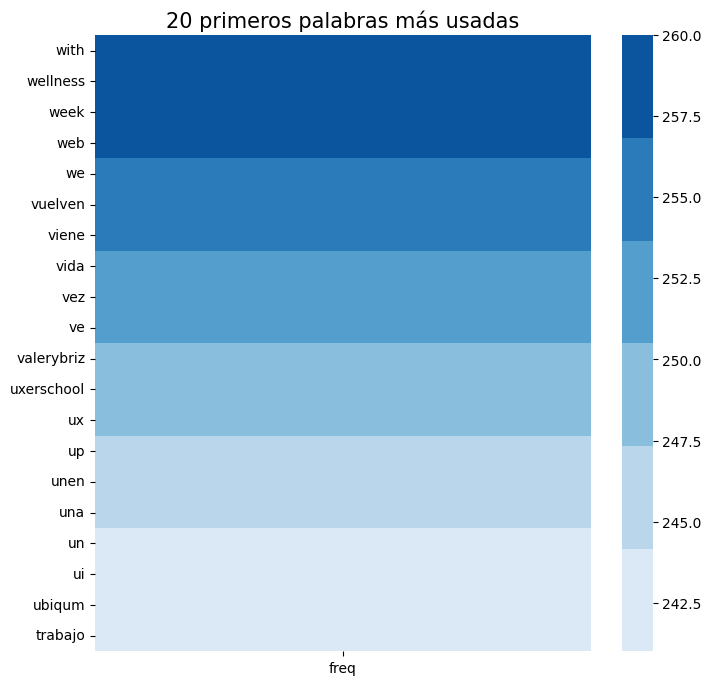

In [51]:
plt.figure(figsize=(8,8))
colormap=sns.color_palette("Blues")
sns.heatmap(df_grafica_4,cmap=colormap)
plt.title('20 primeros palabras más usadas',fontsize=15)
;

#### 5.- RELACIÓN MÉTRICAS.

Generamos un DataFrame únicamente con las métricas de los Tweets.

In [53]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     68 non-null     int64 
 1   identity  68 non-null     int64 
 2   text      68 non-null     object
 3   created   68 non-null     object
 4   user_id   68 non-null     int64 
 5   quote     68 non-null     int64 
 6   reply     68 non-null     int64 
 7   retweet   68 non-null     int64 
 8   favorite  68 non-null     int64 
 9   month     68 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 5.4+ KB


In [54]:
df_metrics=pd.DataFrame()
df_metrics['quote']=df_tweets['quote']
df_metrics['reply']=df_tweets['reply']
df_metrics['retweet']=df_tweets['retweet']
df_metrics['favorite']=df_tweets['favorite']
df_metrics['populous']=df_tweets['populous']
df_metrics.tail()

KeyError: 'populous'

In [55]:
df_metrics.sort_values(by='favorite',ascending=False)

,quote,reply,retweet,favorite
27,4,0,7,20
4,0,0,2,12
65,2,1,5,8
53,0,1,2,5
58,0,0,1,4
...,...,...,...,...
31,0,0,0,0
32,0,0,0,0
33,0,0,0,0
1,0,0,0,0


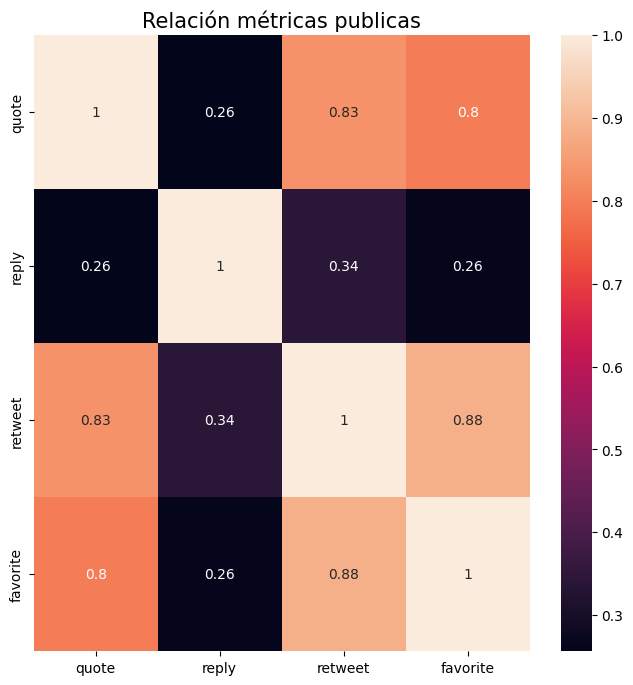

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(df_metrics.corr(), annot=True)
plt.title('Relación métricas publicas',fontsize=15);

Este gráfico, no representa una correlación matemática, pero considero que es bastante útil para observar qué relación existe entre las diferentes variables.

Teniendo además en cuenta que la variable 'populous' la hemos generado nosotros y que es la suma de las anteriores.

Por este motivo, se puede ver qué no hay ningún tipo de relación de la variable  _reply_ con el resto.

Que un _retweet_ suele ir acompañado de un _favorite_, no así al revés (esto es menos frecuente). Y lo mismo pasa con _quote_ y _retweet_.



#### 6. Otras conclusiones.

No he tenido tiempo de realizar más análisis que los planteados en los apartados anteriores.

In [32]:
# ATENCIÓN! Al terminar hay que cerrar la conexión a la DB para que se guarden los cambios!!!!!!
connection.commit()
connection.close()